<a href="https://colab.research.google.com/github/Alton1998/Tensorflow-tutorial-2.0/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

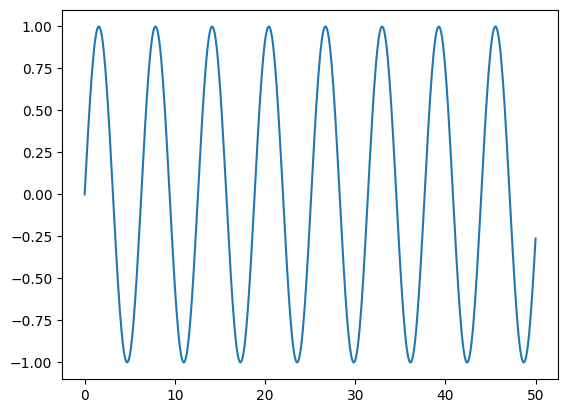

In [3]:
plt.plot(x,y)

In [4]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [5]:
len(df)

501

In [6]:
test_percent = 0.1

In [7]:
test_point = np.round(len(df)*test_percent)

In [8]:
test_ind = int(len(df) - test_point)

In [9]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(train)

MinMaxScaler()

In [13]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [16]:
len(scaled_train)

451

In [17]:
len(generator) # n_input = 2

449

In [18]:
X,y = generator[0]

In [19]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622]
Predict this y: 
 [[0.59933458]]


In [20]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [21]:
# What does the first batch look like?
X,y = generator[0]

In [22]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622 0.59933458 0.64776041 0.69470985 0.73971381
 0.78232262 0.82211054 0.85868004 0.89166571]
Predict this y: 
 [[0.92073798]]


In [23]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [25]:
n_features = 1

In [26]:
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.fit_generator(generator,epochs=5)

<ipython-input-28-063492f5aede>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=5)


Epoch 1/5
401/401 [==============================] - 10s 13ms/step - loss: 0.0024
Epoch 2/5
401/401 [==============================] - 3s 9ms/step - loss: 2.3518e-05
Epoch 3/5
401/401 [==============================] - 8s 20ms/step - loss: 1.3726e-04
Epoch 4/5
401/401 [==============================] - 8s 21ms/step - loss: 3.9316e-05
Epoch 5/5
401/401 [==============================] - 7s 17ms/step - loss: 1.4808e-04


<Axes: >

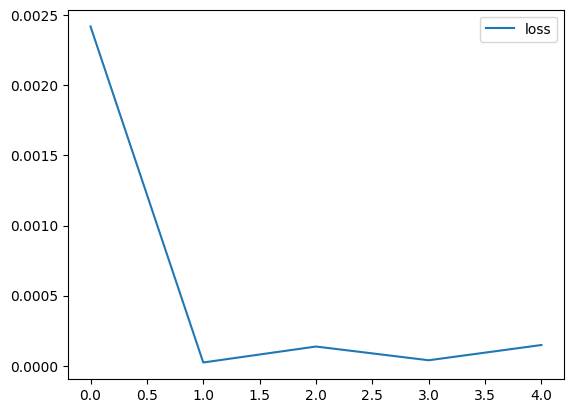

In [29]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [31]:
first_eval_batch = scaled_train[-length:]

In [32]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [33]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 184ms/step


array([[0.98604965]], dtype=float32)

In [34]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [35]:
current_batch.shape

(1, 50, 1)

In [36]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [37]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [38]:
test_predictions

[array([0.98604965], dtype=float32),
 array([1.0289268], dtype=float32),
 array([1.0663577], dtype=float32),
 array([1.0958557], dtype=float32),
 array([1.1252797], dtype=float32),
 array([1.1611264], dtype=float32),
 array([1.1887319], dtype=float32),
 array([1.2084856], dtype=float32),
 array([1.2203526], dtype=float32),
 array([1.2237968], dtype=float32),
 array([1.223913], dtype=float32),
 array([1.2204785], dtype=float32),
 array([1.2104212], dtype=float32),
 array([1.1946698], dtype=float32),
 array([1.175824], dtype=float32),
 array([1.1513087], dtype=float32),
 array([1.1257598], dtype=float32),
 array([1.0994409], dtype=float32),
 array([1.072275], dtype=float32),
 array([1.0440135], dtype=float32),
 array([1.0143132], dtype=float32),
 array([0.98401684], dtype=float32),
 array([0.9554962], dtype=float32),
 array([0.92723453], dtype=float32),
 array([0.8982324], dtype=float32),
 array([0.87147725], dtype=float32),
 array([0.8453071], dtype=float32),
 array([0.82275575], dtype=

In [39]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [40]:
true_predictions = scaler.inverse_transform(test_predictions)

In [41]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [43]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

<ipython-input-43-53e06c23926f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: >

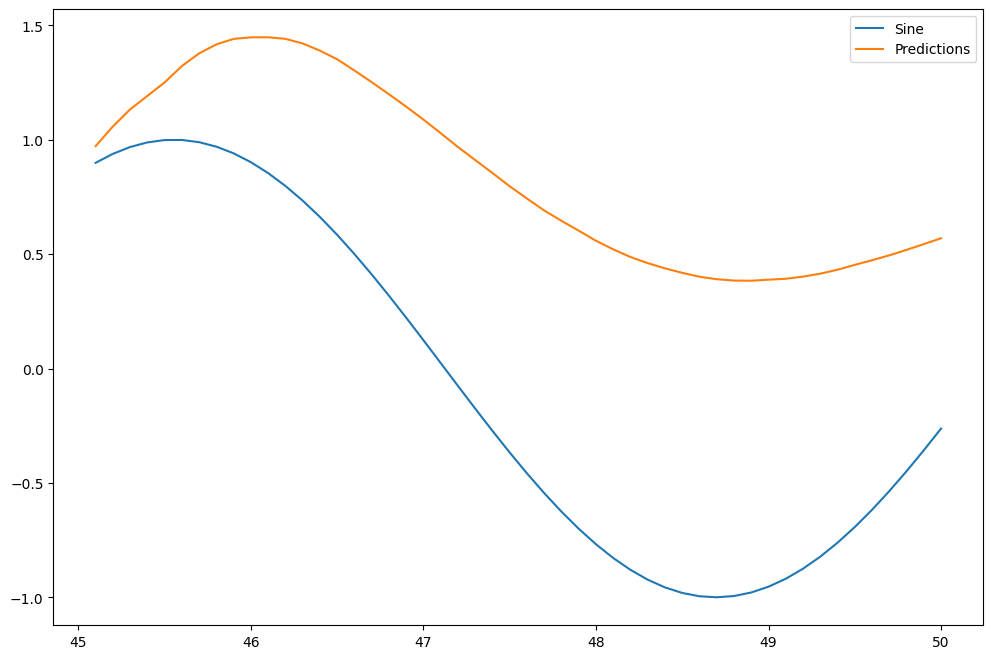

In [44]:
test.plot(figsize=(12,8))

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [46]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

In [47]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [50]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20


<ipython-input-50-0f4ea15b4322>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


402/402 [==============================] - 10s 18ms/step - loss: 0.0118 - val_loss: 8.9398e-05
Epoch 2/20
402/402 [==============================] - 7s 18ms/step - loss: 2.0193e-04 - val_loss: 2.9952e-05
Epoch 3/20
402/402 [==============================] - 8s 21ms/step - loss: 1.8191e-04 - val_loss: 4.3505e-05
Epoch 4/20
402/402 [==============================] - 7s 18ms/step - loss: 4.1714e-04 - val_loss: 2.0775e-06
Epoch 5/20
402/402 [==============================] - 7s 17ms/step - loss: 4.4123e-05 - val_loss: 4.9515e-05
Epoch 6/20
402/402 [==============================] - 8s 20ms/step - loss: 7.6971e-05 - val_loss: 1.8110e-05


In [51]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


<ipython-input-52-914eb3146fc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

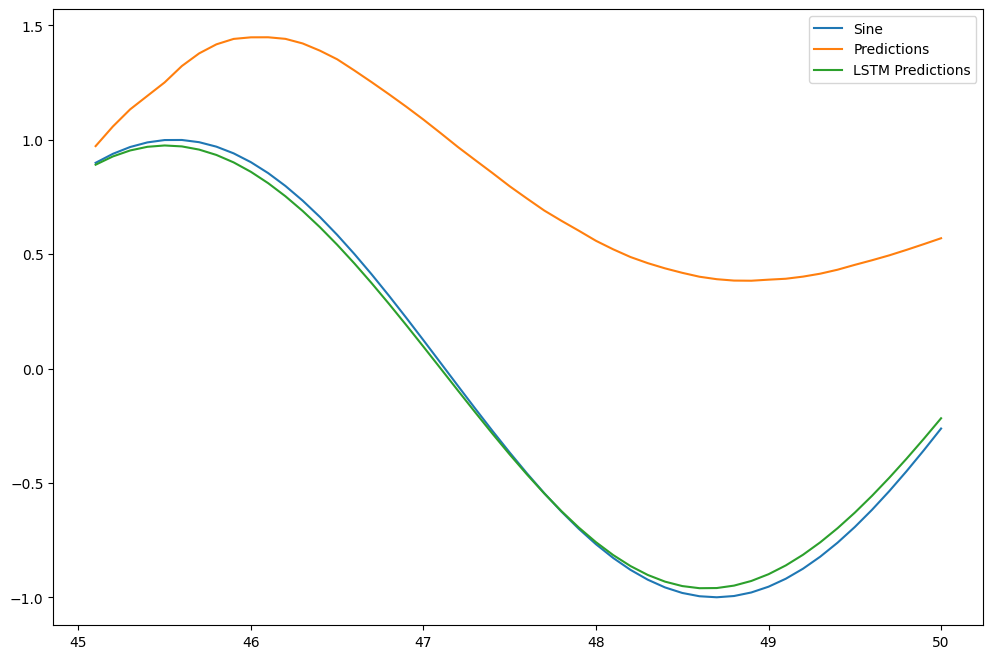

In [52]:
# IGNORE WARNINGS
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [53]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [54]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [55]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6


<ipython-input-55-ee2f981b94f1>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=6)


451/451 [==============================] - 12s 21ms/step - loss: 0.0171
Epoch 2/6
451/451 [==============================] - 10s 22ms/step - loss: 1.0705e-04
Epoch 3/6
451/451 [==============================] - 8s 18ms/step - loss: 1.4082e-04
Epoch 4/6
451/451 [==============================] - 9s 20ms/step - loss: 2.7144e-04
Epoch 5/6
451/451 [==============================] - 9s 20ms/step - loss: 3.2652e-04
Epoch 6/6
451/451 [==============================] - 8s 18ms/step - loss: 8.9681e-05


In [56]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 34ms/step


In [57]:
forecast = scaler.inverse_transform(forecast)

In [58]:
forecast_index = np.arange(50.1,55.1,step=0.1)

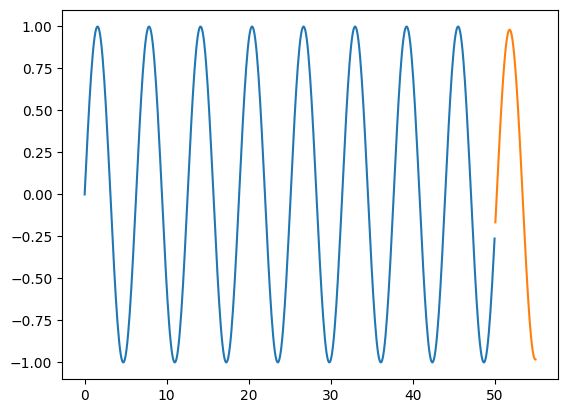

In [59]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)